In [18]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

tf.reset_default_graph() 
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = load_coco_data(data_path='./data', split='val')
with open('./data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (130000,) int32
file_names <type 'numpy.ndarray'> (26000,) <U126
features <type 'numpy.ndarray'> (26000, 196, 512) float32
captions <type 'numpy.ndarray'> (130000, 17) int32
Elapse time: 86.08


In [19]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True,
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [20]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=500, save_every=1, image_path='/mnt/ai_challenger_caption_validation_20170910/caption_validation_images_20170910',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-20',
                                 print_bleu=False, log_path='./log/')

Ground truth 1: <START> 一个 穿着 长袖 的 孩子 在 洒满 阳光 的 草地 上 奔跑 .
Ground truth 2: <START> 一个 身穿 白色 上衣 的 孩子 跑 在 宽阔 的 草地 上 .
Ground truth 3: <START> 草地 上 跑 着 一个 穿着 长袖 的 小男孩 .
Ground truth 4: <START> 一个 穿着 浅色 上衣 的 小孩 跑 在 阳光明媚 的 草地 上 .
Ground truth 5: <START> 绿油油 的 草地 上 有 一位 穿着 白色 上衣 的 男孩 在 跑步 .
Sampled Caption: 一个 穿着 黑色 上衣 的 男人 和 一个 穿着 白色 上衣 的 女人 在 绿油油 .
<< original image >>


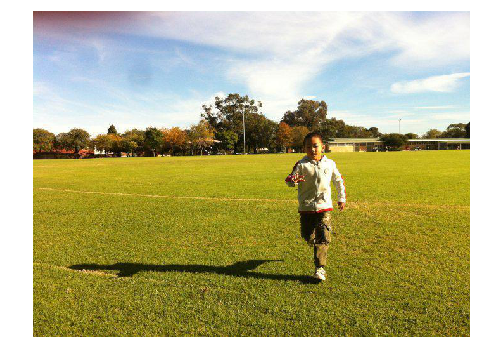

<< attention array >>


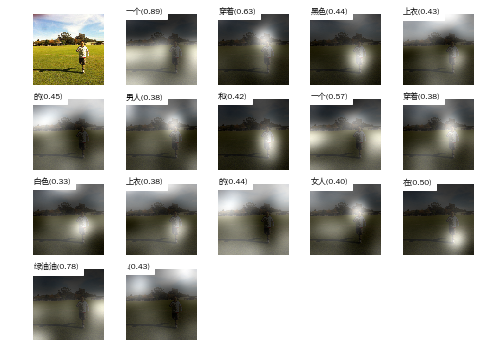




Ground truth 1: <START> 宽敞 的 球场上 一个 男人 前面 有 两个 身穿 运动服 的 男人 在 推搡 .
Ground truth 2: <START> 一个 穿着 1 号 球衣 的 人 前面 有 两个 穿 球衣 的 人 在 .
Ground truth 3: <START> 一个 人身 前有 两个 穿着 不同 球衣 的 男人 在 运动场 上 争抢 .
Ground truth 4: <START> 运动场 上 一个 人 的 前面 有 两个 穿着 球衣 的 运动员 在 打篮球 .
Ground truth 5: <START> 三个 穿着 球衣 的 男人 看着 球场上 上空 .
Sampled Caption: 三个 人 的 前面 有 两个 穿着 运动服 的 运动员 在 运动场 上 争抢 篮球 .
<< original image >>


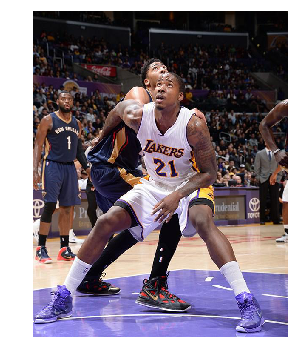

<< attention array >>


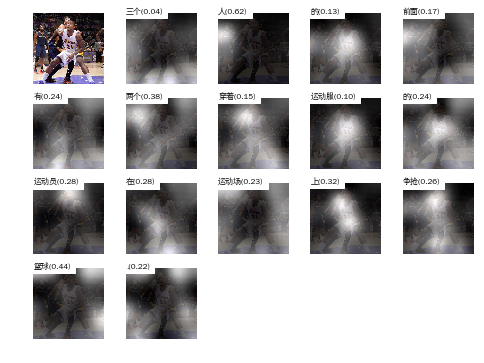




Ground truth 1: <START> 一个 穿着 黑色 西装 的 男人 和 一个 穿着 裙子 的 女人 坐在 海边 的 .
Ground truth 2: <START> 一个 右腿 抬起 的 男人 和 一个 穿着 婚纱 的 女人 坐在 大 海边 .
Ground truth 3: <START> 一个 穿着 西装 的 的 男人 和 一个 穿着 婚纱 的 女人 坐在 海边 .
Ground truth 4: <START> 一个 穿着 西装 的 男人 和 一个 穿着 裙子 的 女人 坐在 海边 的 石头 .
Ground truth 5: <START> 一个 穿着 黑色 外套 的 男人 和 一个 扎 着 头发 的 女人 坐在 海边 .
Sampled Caption: 一望无际 的 大 海边 有 一个 穿着 白色 上衣 的 男人 坐在 石头 上 .
<< original image >>


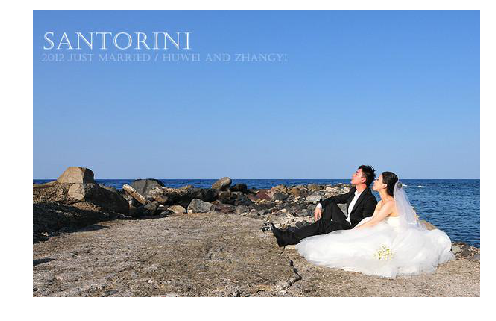

<< attention array >>


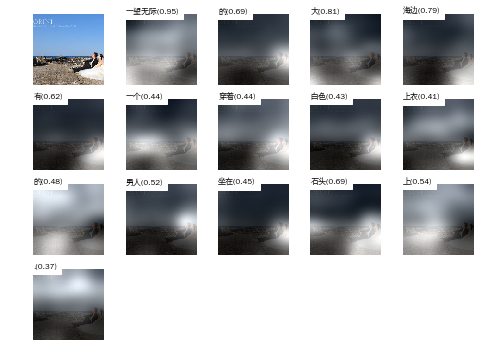




Ground truth 1: <START> 绿茵茵 的 球场上 有 两个 穿着 球衣 的 男人 在 争抢 足球 .
Ground truth 2: <START> 碧绿 的 球场上 有 两位 穿着 球服 的 男士 在 抢 足球 .
Ground truth 3: <START> 球场上 有 两个 穿着 运动服 的 男人 在 争抢 足球 .
Ground truth 4: <START> 两个 穿着 球服 的 男人 在 球场上 踢足球 .
Ground truth 5: <START> 两个 穿着 不同 球衣 的 男人 在 运动场 上 争抢 足球 .
Sampled Caption: 两个 穿着 不同 颜色 球衣 的 男人 在 球场上 抢 足球 .
<< original image >>


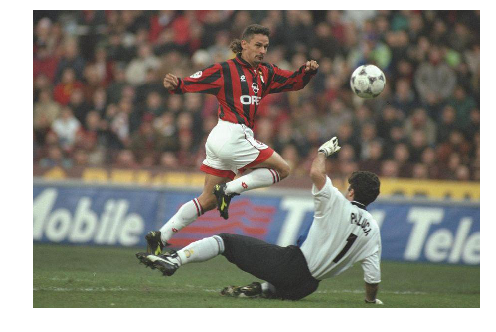

<< attention array >>


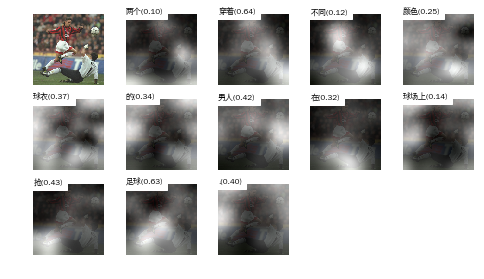




Ground truth 1: <START> 房间 里 两个 站 着 的 人 旁边 有 一个 扎 着 头发 的 女人 .
Ground truth 2: <START> 医院 里 有 三个 穿着 白色 大褂 的 人 在 工作 .
Ground truth 3: <START> 房屋里 有 三个 穿着 白大褂 的 人 在 工作 .
Ground truth 4: <START> 房间 里 有 三个 身穿 白大褂 的 人 在 工作 .
Ground truth 5: <START> 实验室 里 有 三个 穿着 白色 大褂 的 人 在 做 实验 .
Sampled Caption: 房间 里 一个 穿着 白大褂 的 女人 在 给 一个 穿着 白色 上衣 的 女人 .
<< original image >>


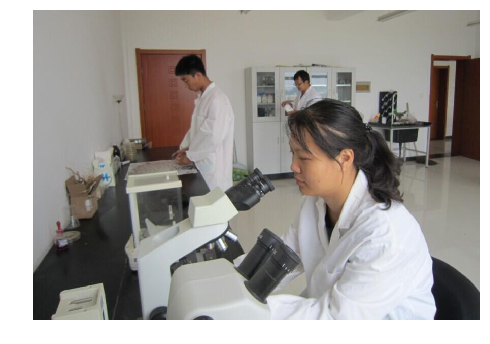

<< attention array >>


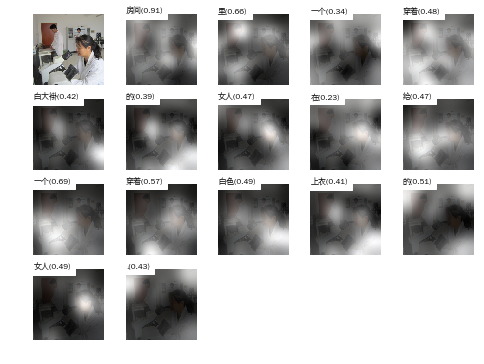




Ground truth 1: <START> 球场上 有 两位 穿着 球服 的 男士 在 争抢 足球 .
Ground truth 2: <START> 两个 男人 前面 有 两个 穿着 背心 的 男人 在 碧绿 的 草地 上 抢 .
Ground truth 3: <START> 宽敞 的 草地 上 三个 人 前面 有 两个 身穿 运动服 的 男人 在 抢 .
Ground truth 4: <START> 足球场 上 的 两个 人前 有 两个 穿着 运动服 的 男人 在 踢足球 .
Ground truth 5: <START> 球场上 两个 人 前面 有 两个 穿着 球服 的 男人 在 抢 足球 .
Sampled Caption: 球场上 有 一群 穿着 运动服 的 男人 在 踢足球 .
<< original image >>


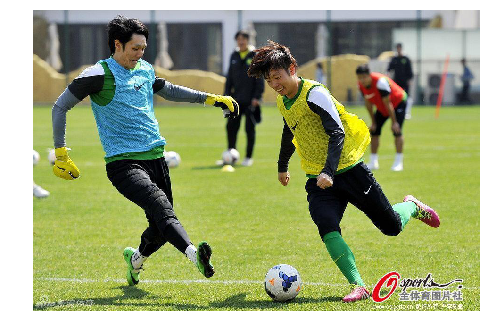

<< attention array >>


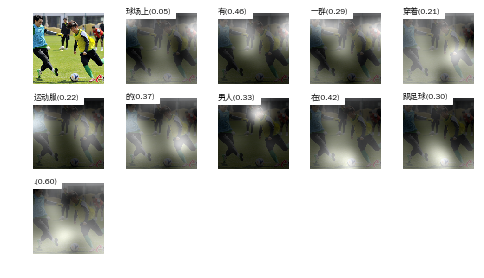




Ground truth 1: <START> 道路 上 走 着 一个 左手 拎 着 袋子 的 女人 .
Ground truth 2: <START> 一个 左手 拎 着 袋子 的 女人 走 在 平坦 的 街道 上 .
Ground truth 3: <START> 平坦 的 街道 上 走 着 一个 左手 拎 着 袋子 的 女人 .
Ground truth 4: <START> 一个 左手 拎 着 袋子 的 女人 行走 在 洒满 阳光 的 街道 上 .
Ground truth 5: <START> 平坦 的 街道 上 走 着 一个 左手 提 着 袋子 的 女人 .
Sampled Caption: 一个 戴着 墨镜 的 女人 和 一个 穿着 短裤 的 女人 走 在 道路 上 .
<< original image >>


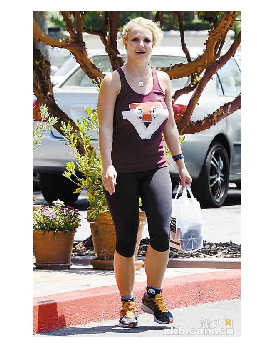

<< attention array >>


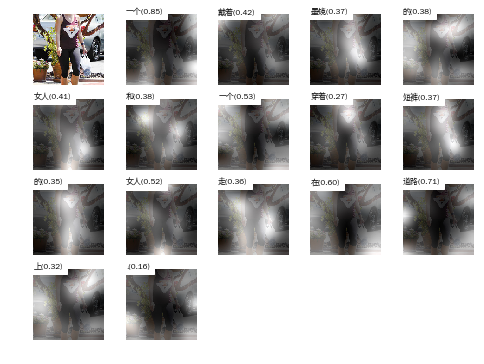




Ground truth 1: <START> 室外 有 一个 左手 拿 着 纸张 的 男人 在 看 一匹 马 .
Ground truth 2: <START> 屋外 的 道路 上 一个 穿着 古装 服饰 的 男人 站 在 一只 马 的 .
Ground truth 3: <START> 一个 左手 拿 着 本子 的 男人 站 在 道路 上 看着 一匹 马 .
Ground truth 4: <START> 房屋 外 一个 穿着 白色 上衣 的 男人 站 在 马旁 .
Ground truth 5: <START> 一个 左手 拿 着 书 的 男人 摸 着 一匹 马站 在 道路 上 .
Sampled Caption: 一个 戴着 墨镜 的 男人 站 在 商店 里 的 货架 旁 .
<< original image >>


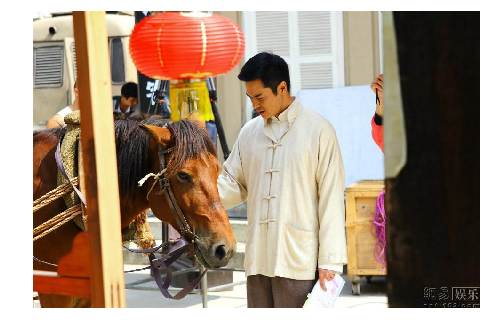

<< attention array >>


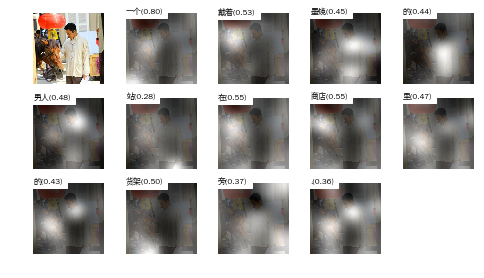




Ground truth 1: <START> 马路边 一个 穿着 白色 上衣 的 男人 身后 有 一对 走 着 的 男女 在 .
Ground truth 2: <START> 道路 上 两个 人 旁边 走 着 一个 左手 放在 身前 右手 拿 着 包 .
Ground truth 3: <START> 一个 人 的 后面 有 一个 右手 拿 着 包 的 女人 和 一个 穿着 .
Ground truth 4: <START> 两个 人旁 有 一个 右手 拿 着 包 的 女人 走 在 道路 上 .
Ground truth 5: <START> 两个 人 旁边 有 一个 右手 拿 着 包 的 女人 和 一个 穿着 深色 .
Sampled Caption: 一个 戴着 墨镜 的 女人 走 在 人来人往 的 道路 上 .
<< original image >>


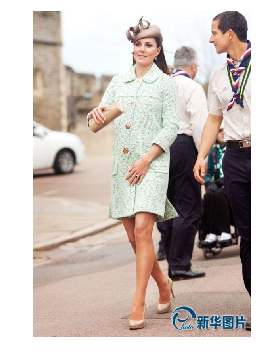

<< attention array >>


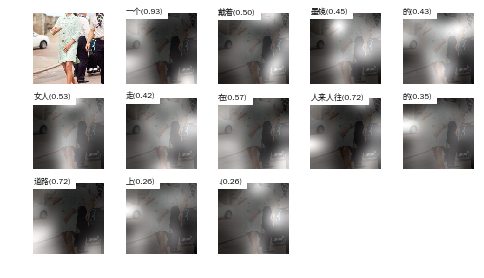




Ground truth 1: <START> 一群 身穿 同样 衣服 的 人 站 在 碧绿 的 草地 上 .
Ground truth 2: <START> 一群 双手 竖起 大拇指 的 人 并排 站 在 生机勃勃 的 草坪 上 .
Ground truth 3: <START> 一群 双手 竖 着 大拇指 的 女人 站 在 绿油油 的 草地 上 .
Ground truth 4: <START> 绿茵茵 的 草地 上 站 着 一群 双手 比 着 手势 的 女人 .
Ground truth 5: <START> 碧绿 的 草坪 上 站 着 一群 竖 着 大拇指 的 人 .
Sampled Caption: 一群 穿着 各异 的 人 站 在 绿油油 的 葡萄园 里 .
<< original image >>


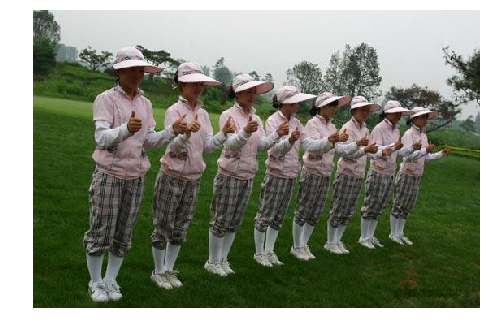

<< attention array >>


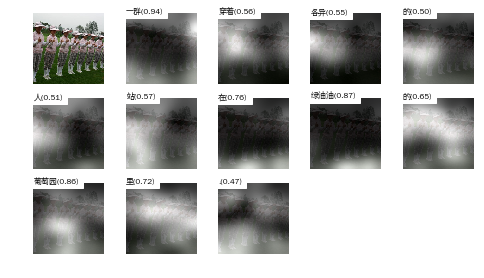




Saved ./data/val/val.candidate.captions.pkl..


In [21]:
solver.test(data, split='val')

In [ ]:
import sys
sys.path.append('/data/AI_Challenger/AI_Challenger_eval_public/caption_eval')

